Extracting EDF parameters from c:\Users\arago\OneDrive\Desktop\BCI\varbaz12.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Using matplotlib as 2D backend.


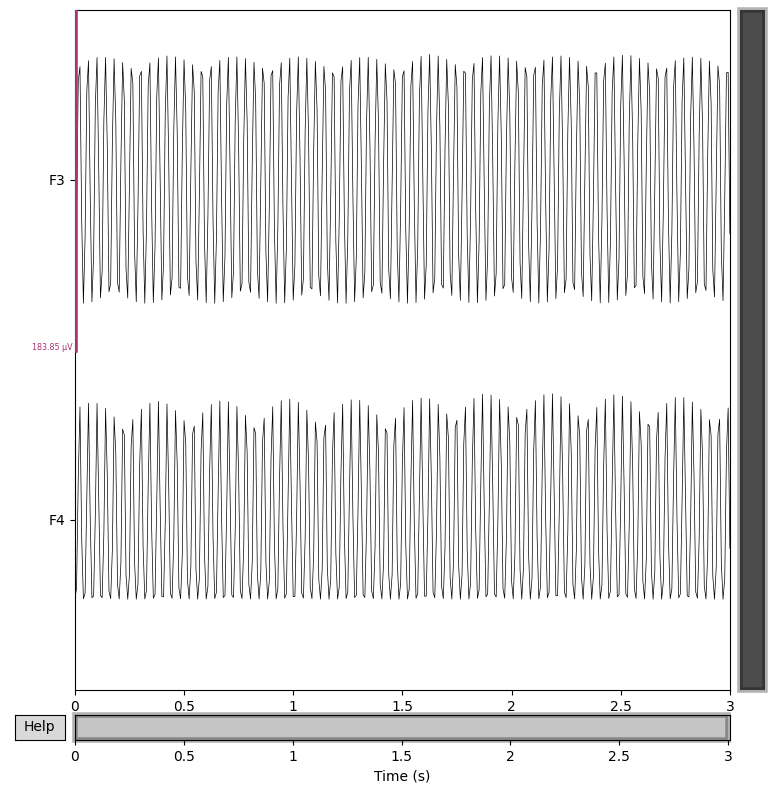

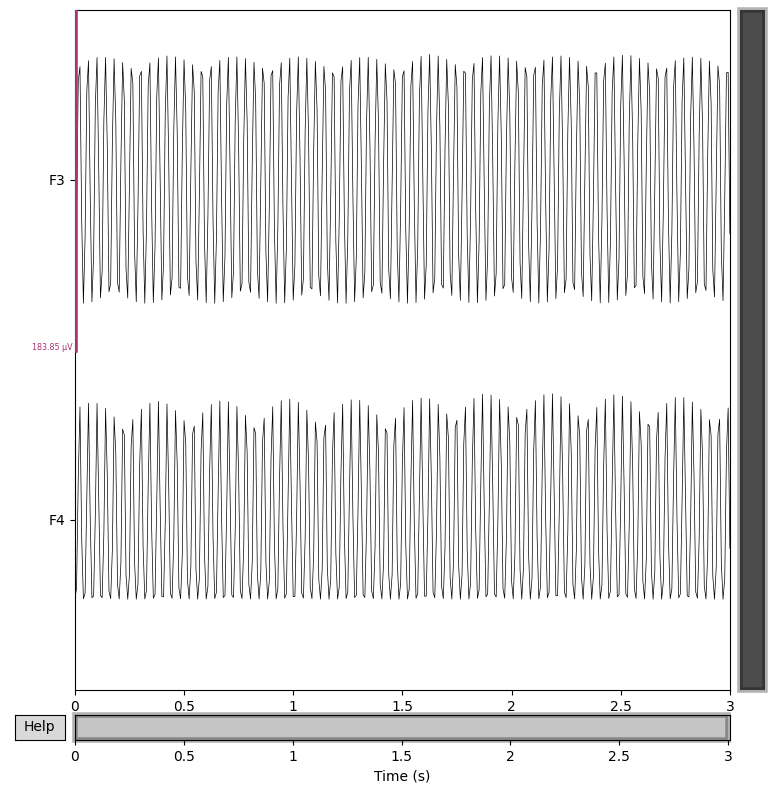

In [5]:
import mne

edf_file = 'varbaz12.edf'

raw = mne.io.read_raw_edf(edf_file)

channel_names = ['F3', 'F4']
raw.pick_channels(channel_names)

start_time = 6  
end_time = 9    

raw.crop(tmin=start_time, tmax=end_time)

raw.plot(n_channels=len(channel_names), scalings='auto', title='EEG Signals: F3 vs F4')


Extracting EDF parameters from c:\Users\arago\OneDrive\Desktop\BCI\varbaz12.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


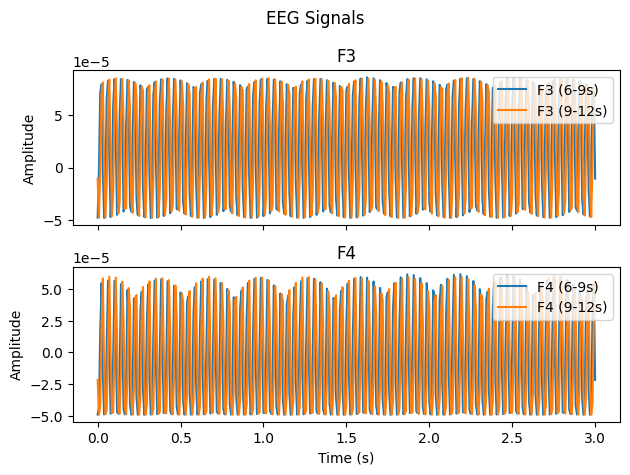

In [7]:
import mne
import matplotlib.pyplot as plt

# Load EDF file
edf_file = 'varbaz12.edf'

# Read the EDF data
raw = mne.io.read_raw_edf(edf_file)

# Select channels F3 and F4
channel_names = ['F3', 'F4']
raw.pick_channels(channel_names)

# Define the time ranges of interest
time_ranges = [(6, 9), (9, 12)]

# Create a figure with subplots
fig, axes = plt.subplots(nrows=len(channel_names), ncols=1, sharex=True)

# Plotting
for channel_index, channel_name in enumerate(channel_names):
    ax = axes[channel_index]

    for i, (start_time, end_time) in enumerate(time_ranges):
        # Crop the data to the specified time range
        data = raw.copy().crop(tmin=start_time, tmax=end_time)

        # Get the signal for the current channel
        signal = data.get_data()[channel_index]

        # Create a time vector for x-axis
        time = data.times

        # Plot the EEG signals
        ax.plot(time, signal, color='C{}'.format(i), label='{} ({}-{}s)'.format(channel_name, start_time, end_time))

    # Customize the plot for each channel
    ax.set_ylabel('Amplitude')
    ax.set_title(channel_name)
    ax.legend(loc='upper right')

# Customize the overall plot
plt.xlabel('Time (s)')
plt.suptitle('EEG Signals')

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()
